# SR-Dyna: Successor Representation & Offline Replay
## Learning Predictive Representations with SR Dyna

Here we will use a SR-DYNA class where the agent learns predictive (successor) representations that guide its decisions, and updates them via offline replay after each episode. 

We compare the number of episodes it takes the algorithm to converge under different learning rates and discount parameters. In another notebook we have compared this outcome to SR-(only) learners.

For simplicity we will look at Experiment 1 from Momennejad et al. 2017, where there are no actions to take during learning and the agent is moved from state to state. The only choice is during test: a decision between the two sequences. 

This notebook focuses on simply learning with SRDyna, compares its performance in terms of the number of episodes till convergence. The SR-Dyna agent learns SR and values weights, update SR via offline replay, compute value function using this learned information, and then the decision will pick the starting state with the highest value. We then compare the results with those of an SR-only algorithm in terms of number of episodes to convergence. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math 
from SRdyna_nathum_exp1 import SRDyna_nathum_exp1
from SR_Dyna_no_action import SR_Dyna_no_action
import ida_envs
from mpl_toolkits import mplot3d # for 3D plot

# Plot the graph of Experiment 1
This function uses the graphviz librart to plot the graph of the experiment as a separate window and saves it as pdf. 

In [2]:
ida_envs.plot_env1()

# Train an SR agent to make decisions in the environment
1) Set up the environment envstep
2) Use a function that (a) initializes an agent from the class SR_no_action given learning rate (alpha) and discount (gamma) parameters, and (b) has the agent interact with the environment and learn what to do (cf: SRclass_nathum_exp1.py)
3) Compute the value of options and see which starting state the agent uses. 

7  training episodes/iterations done
The best starting state is: 0 or state 1
################################
gamma: 0.2, alpha: 0.6
Best starting state is: 0 or state 1


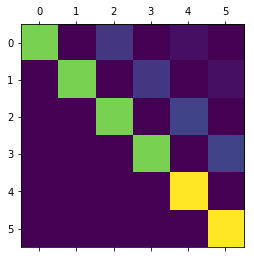

In [2]:
# Set discount factor & learning rate
gamma, alpha = 0.2, .6
p_sample = [.5,.5] # probability of sampling each starting state 
verbose = 0

# 1) create the environment
envstep = ida_envs.generate_nathumbeh_env1()

# 2) create SR agent, let it learn the environment
M, W, mem, total_episodes = SRDyna_nathum_exp1(envstep, gamma, alpha, p_sample, verbose)

# 3) compute value using SR & value weights
v=M@W 
print(f'The best starting state is: {np.argmax([v[0],v[1]])} or state {np.argmax([v[0],v[1]])+1}')
print('################################')
print(f'gamma: {gamma}, alpha: {alpha}')
print(f'Best starting state is: {np.argmax([v[0],v[1]])} or state {np.argmax([v[0],v[1]])+1}')
plt.matshow(M)

# How long does learning take?

There are two parameters involved in how long it takes to learn: the learning rate and the discount factor or the scale of the predictive representations that are learned. Below we generate many successor representation matrices with different alpha and gamma parameters, compute the number of episodes it takes to converge in each case, and present the 3D plot for comparison.

In [3]:
alphas = [.1, .2, .3, .4, .6, .8]
gammas = [.1, .2, .3, .4, .6, .8]

def f(X , Y):
    # [x[:] for x in [[1] * 10] * 10]
    f= np.zeros(shape=X.shape)
    ax = 0
    #print(np.shape(f))
    for alpha in X[0]:  
        gx = 0
        #print(alpha)
        for gamma in Y[0]:            
            print(f'Learning for alpha: {alpha} and gamma: {gamma}')
            M, W, mem, total_episodes = SRDyna_nathum_exp1(envstep, gamma, alpha, p_sample, verbose)
            f[ax][gx]=total_episodes
            gx+=1
        ax +=1        
    return f

# learn SR-Dyna for each alpha & gamma 100 times, take mean
for zx in range(100):
    X, Y = np.meshgrid(alphas, gammas)
    Z = f(X, Y)
    if zx==0:
        meanZSRyna=Z
    else:
        meanZSRyna = (Z + meanZSRyna)/2

Learning for alpha: 0.1 and gamma: 0.1
42  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
91  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
75  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
80  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
67  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
9  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
22  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
30  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
28  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6  training episodes/iterations done
Le

69  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
85  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
88  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
47  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
51  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
86  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
49  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6  

80  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
93  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
80  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
102  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
19  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
40  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
44  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
19  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
30  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
16  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
25  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.

74  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
53  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
40  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
103  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
43  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
42  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
44  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
16  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
32  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6 

96  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
68  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
84  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
39  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
36  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
11  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
28  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
9  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
24 

87  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
22  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
47  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
10  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
29  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
17  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
10  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  t

52  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
38  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
17  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
17  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  tr

55  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
10  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
27  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
13  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
25  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
44  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
15  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
11  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
4 

Learning for alpha: 0.3 and gamma: 0.1
23  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
17  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
33  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
9  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
11  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
8  training episodes/iterations done
Learnin

21  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
17  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
10  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
16  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
5  trai

14  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
13  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
2  traini

8  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
13  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
3  training

3  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
83  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
68  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
13  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
121  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
115  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
47  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
38  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
13  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
23  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
13  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1


94  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
84  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
64  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
90  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
43  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
102  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
22  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1


82  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
72  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
67  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
43  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
12  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
47  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
39  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
23  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
27  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
27  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1


80  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
50  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
58  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
59  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
17  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
25  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
15  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
25  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
11  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
18  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
23  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1


75  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
104  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
17  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
15  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
35  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
18  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
11  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
1

Learning for alpha: 0.2 and gamma: 0.1
25  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
32  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
41  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
39  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
9  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
12  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
13  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
11  training episodes/iterations done
Le

12  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
23  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
11  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
10  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
3  train

3  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
25  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
2  trainin

66  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
111  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
62  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
91  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
70  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
27  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
45  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
23  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
41  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
39  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1


93  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
57  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
51  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
44  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
38  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
12  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
45  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
13  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
17  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1


118  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
27  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
25  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
44  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  

23  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
22  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
12  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
13  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
3  tra

8  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
18  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
12  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
15  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
2  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
3  train

72  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
104  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
71  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
33  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
73  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
69  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
37  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
22  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
19  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
10  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
41  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.

88  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
65  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
61  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
55  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
76  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
91  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
36  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
34  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
41  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
39  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
34  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
30  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1

73  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
44  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
66  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
90  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
96  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
114  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
42  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
38  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
37  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
38  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
28  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1

92  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
81  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
108  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
120  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
44  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
10  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
40  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
53  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
23  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1


84  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
94  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
66  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
27  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
54  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
19  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
16  tr

80  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
96  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
22  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
22  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
46  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
16  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
22  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
9  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
1

103  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
78  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
11  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
28  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
8  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
35  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
23  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
11

78  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
57  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
9  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
6  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
7  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
3  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
4  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
5  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
29  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
5  tra

# Comparing #episodies to converegnce (mean of 100 repetition)

The 3D plot below compares number of episodes to converegnce for different learning rates and gammas. 
We run the model with each alpha and gamma parameter 100 times and take the mean. 
The 3D plot below shows the outcome.

Minimum number of episodes to convergence: 2.0187402744674117
Max number of episodes to convergence: 75.92884935904934


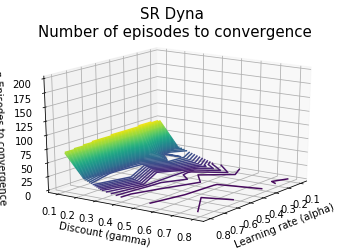

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.contour3D(X, Y, meanZSRyna, 50)
ax.set_xlabel('Learning rate (alpha)')
ax.set_zlim(0, 200) # set Z limit to 200 to compare to SR-ONLY's 3D plot
ax.set_ylabel('Discount (gamma)')
ax.set_zlabel('n Episodes to convergence');

print(f'Minimum number of episodes to convergence: {np.min(meanZSRyna)}')
print(f'Max number of episodes to convergence: {np.max(meanZSRyna)}')
ax.set_title('SR Dyna \nNumber of episodes to convergence', fontsize=15);
np.argmin(meanZSRyna)
fig.savefig(f'SRDYNA_contour_episodes.pdf{int(time.clock())}.pdf' )

# Same 3D plot, different styles, Z limit -> 80 (max episodes for SR-Dyna)

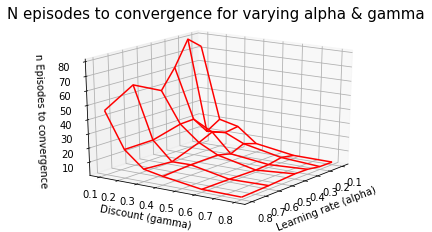

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.plot_wireframe(X, Y, meanZSRyna, color='red')
ax.set_xlabel('Learning rate (alpha)')
ax.set_ylabel('Discount (gamma)')
ax.set_zlabel('n Episodes to convergence');
ax.set_title('N episodes to convergence for varying alpha & gamma', fontsize=15);

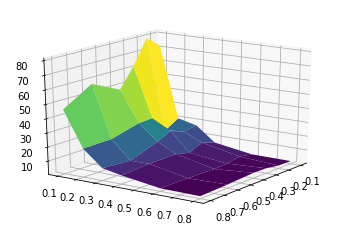

In [20]:
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.plot_surface(X, Y, meanZSRyna, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

# II. Comparison of SR-Dyna with SR-only

Below we provide the same 3D plots as provided above for learning SR only (no replay) across different learning rates (alphas) and discount parameters (gammas).


In [28]:
from SRclass_nathum_exp1 import SRclass_nathum_exp1
from SR_no_action import SR_no_action

alphas = [.1, .2, .3, .4, .6, .8]
gammas = [.1, .2, .3, .4, .6, .8]

def fSR(X , Y):
    # [x[:] for x in [[1] * 10] * 10]
    fSR= np.zeros(shape=X.shape)
    ax = 0
    #print(np.shape(f))
    for alpha in X[0]:  
        gx = 0
        #print(alpha)
        for gamma in Y[0]:            
            print(f'Learning for alpha: {alpha} and gamma: {gamma}')
            M, W, mem, total_episodes = SRclass_nathum_exp1(envstep, gamma, alpha, p_sample, verbose)
            fSR[ax][gx]=total_episodes
            gx+=1
        ax +=1        
    return fSR

# for the 3D plot: 
# learn SR for each alpha & gamma 100 times, take mean

for zx in range(100):
    X, Y = np.meshgrid(alphas, gammas)
    Z = fSR(X, Y)
    if zx==0:
        meanZSR=Z
    else:
        meanZSR = (Z + meanZSR)/2

Learning for alpha: 0.1 and gamma: 0.1
192  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
175  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
209  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
199  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
193  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
191  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
92  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
89  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
98  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
110  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
105  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
68  training episodes/iterati

194  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
200  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
101  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
89  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
92  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
79  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
103  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
94  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
69  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
65  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
64  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
70  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
63  training episodes/iterations done
Learning for alpha: 0.3 and gamma:

193  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
203  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
169  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
85  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
108  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
108  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
104  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
97  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
87  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
69  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
66  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
72  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
70  training episodes/iterations done
Learning for alpha: 0.3 and gamm

96  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
101  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
109  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
107  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
108  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
101  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
57  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
58  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
67  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
57  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
62  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
61  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
50  training episodes/iterations done
Learning for alpha: 0.4 and gamma

102  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
88  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
67  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
62  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
72  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
60  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
72  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
38  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
47  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
51  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
51  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
46  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.

68  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
65  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
71  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
57  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
66  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
45  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
47  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
40  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
29  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
30  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1

32  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
15  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
14  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
15  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
17  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
194  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
183  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
185  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
186  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
194  training episodes/iterations done
Learning for alpha: 0.1 and gamma

200  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
183  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
217  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
98  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
98  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
98  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
101  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
61  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
67  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
56  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
70  training episodes/iterations done
Learning for alpha: 0.3 and gamma:

181  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
183  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
85  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
99  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
108  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
96  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
103  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
111  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
68  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
68  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
62  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
69  training episodes/iterations done
Learning for alpha: 0.3 and gamma

93  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
105  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
68  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
50  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
64  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
60  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
63  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
47  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
42  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
53  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.

58  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
66  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
66  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
53  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
66  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
44  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
47  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
53  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
49  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
40  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
45  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
24  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1

45  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
51  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
46  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
28  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
16  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1

20  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
27  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
25  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
18  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
16  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
19  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
18  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
19  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
205  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
167  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0

202  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
180  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
196  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
204  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
171  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
192  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
89  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
109  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
106  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
111  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
107  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
54  training episodes/iterations done
Learning for alpha: 0.3 and 

213  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
208  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
176  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
202  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
188  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
107  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
99  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
103  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
104  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
101  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
65  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
66  training episodes/iterations done
Learning for alpha: 0.3 and g

210  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
187  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
202  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
169  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
175  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
100  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
105  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
101  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
100  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
102  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
92  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
66  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
63  training episodes/iterations done
Learning for alpha: 0.3 and 

191  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
198  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
200  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
204  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
205  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
96  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
108  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
91  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
106  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
104  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
100  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
67  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
64  training episodes/iterations done
Learning for alpha: 0.3 and g

184  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
210  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
203  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
199  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
107  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
111  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
93  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
105  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
111  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
102  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
66  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
73  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
63  training episodes/iterations done
Learning for alpha: 0.3 and g

213  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
196  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
99  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
104  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
86  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
103  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
99  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
96  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
70  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
71  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
68  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
61  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
60  training episodes/iterations done
Learning for alpha: 0.3 and gamma:

184  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
174  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
106  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
105  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
88  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
108  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
73  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
57  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
58  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
69  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
59  training episodes/iterations done
Learning for alpha: 0.3 and gamma

187  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
195  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
106  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
109  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
100  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
96  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
105  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
73  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
70  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
64  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
73  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
55  training episodes/iterations done
Learning for alpha: 0.3 and gamm

102  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
110  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
108  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
93  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
70  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
62  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
67  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
67  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
62  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
57  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
45  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
44  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 

68  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
44  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
41  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
45  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
27  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
32  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
23  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
30  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
29  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
25  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1

32  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
22  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
32  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
28  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
20  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
19  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
18  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
185  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
179  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0

216  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
195  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
206  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
84  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
99  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
92  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
99  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
90  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
83  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
59  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
54  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
63  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
72  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 

111  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
107  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
68  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
59  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
71  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
67  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
65  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
72  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
40  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
48  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
45  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0

67  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
64  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
62  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
61  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
73  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
35  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
49  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
42  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
46  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
30  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
28  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1

50  training episodes/iterations done
Learning for alpha: 0.4 and gamma: 0.1
53  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
31  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
29  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
22  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
25  training episodes/iterations done
Learning for alpha: 0.6 and gamma: 0.1
26  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
18  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
15  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1
21  training episodes/iterations done
Learning for alpha: 0.8 and gamma: 0.1

204  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
181  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
203  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
188  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
204  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
173  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
89  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
101  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
91  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
96  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
84  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
56  training episodes/iterations done
Learning for alpha: 0.3 and gam

181  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
189  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
202  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
189  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
179  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
95  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
93  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
107  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
100  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
87  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
87  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
72  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
52  training episodes/iterations done
Learning for alpha: 0.3 and gam

196  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
200  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
167  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
191  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
91  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
91  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
107  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
99  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
108  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
97  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
61  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
59  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
53  training episodes/iterations done
Learning for alpha: 0.3 and gamm

216  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
177  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
206  training episodes/iterations done
Learning for alpha: 0.1 and gamma: 0.1
210  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
99  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
110  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
88  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
104  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
98  training episodes/iterations done
Learning for alpha: 0.2 and gamma: 0.1
86  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
70  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
68  training episodes/iterations done
Learning for alpha: 0.3 and gamma: 0.1
57  training episodes/iterations done
Learning for alpha: 0.3 and gamm

Minimum number of episodes to convergence: 15.70918190480441
Max number of episodes to convergence: 206.99400128732458


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


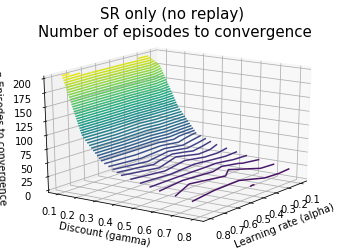

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.contour3D(X, Y, meanZSR, 50)
ax.set_xlabel('Learning rate (alpha)')
ax.set_zlim(0, 200) # set Z limit to 200 to compare to SR-ONLY's 3D plot
ax.set_ylabel('Discount (gamma)')
ax.set_zlabel('n Episodes to convergence');
print(f'Minimum number of episodes to convergence: {np.min(meanZSR)}')
print(f'Max number of episodes to convergence: {np.max(meanZSR)}')
ax.set_title('SR only (no replay) \nNumber of episodes to convergence', fontsize=15);
np.argmin(meanZSR)
fig.savefig(f'contour_episodes{int(time.clock())}.pdf' )

In [36]:
import time
int(time.clock())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


485